In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inside Jupyter
%matplotlib inline

# Set seaborn style
sns.set(style="whitegrid")


In [19]:
# Load the data
df = pd.read_csv(r"C:\Users\Student\Downloads\crime_data.csv")

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Show basic structure
df.head()


,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490


In [ ]:

print(df.isnull().sum())

print(df.dtypes)

print(df.columns.tolist())


States/UTs                     0
District                       0
Year                           0
Murder                         0
Attempt to commit Murder       0
                              ..
Incidence of Rash Driving      0
HumanTrafficking               0
Unnatural Offence              0
Other IPC crimes               0
Total Cognizable IPC crimes    0
Length: 91, dtype: int64
States/UTs                     object
District                       object
Year                            int64
Murder                          int64
Attempt to commit Murder        int64
                                ...  
Incidence of Rash Driving       int64
HumanTrafficking                int64
Unnatural Offence               int64
Other IPC crimes                int64
Total Cognizable IPC crimes     int64
Length: 91, dtype: object
['States/UTs', 'District', 'Year', 'Murder', 'Attempt to commit Murder', 'Culpable Homicide not amounting to Murder', 'Attempt to commit Culpable Homicide', 'Rape', 'Cu

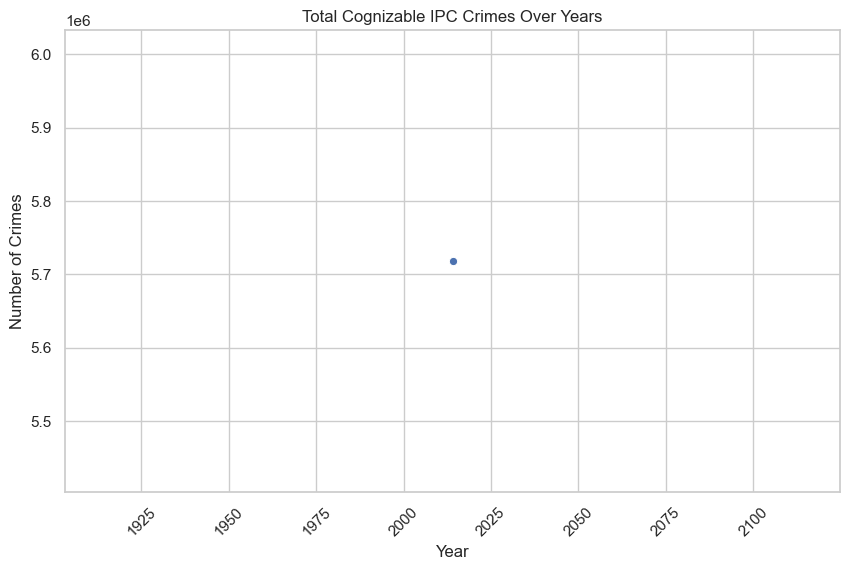

In [23]:
plt.figure(figsize=(10,6))
yearly_crimes = df.groupby('Year')['Total Cognizable IPC crimes'].sum()
sns.lineplot(x=yearly_crimes.index, y=yearly_crimes.values, marker='o')
plt.title("Total Cognizable IPC Crimes Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\Student\AppData\Local\Temp\ipykernel_8276\3305140701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')


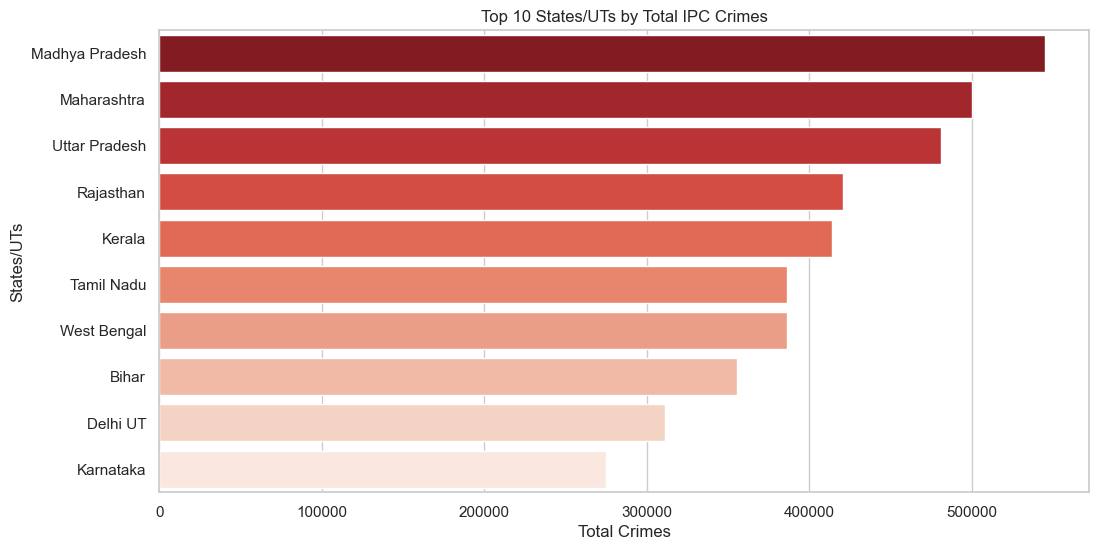

In [25]:
plt.figure(figsize=(12,6))
top_states = df.groupby('States/UTs')['Total Cognizable IPC crimes'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')
plt.title("Top 10 States/UTs by Total IPC Crimes")
plt.xlabel("Total Crimes")
plt.ylabel("States/UTs")
plt.show()


<Figure size 1000x600 with 0 Axes>

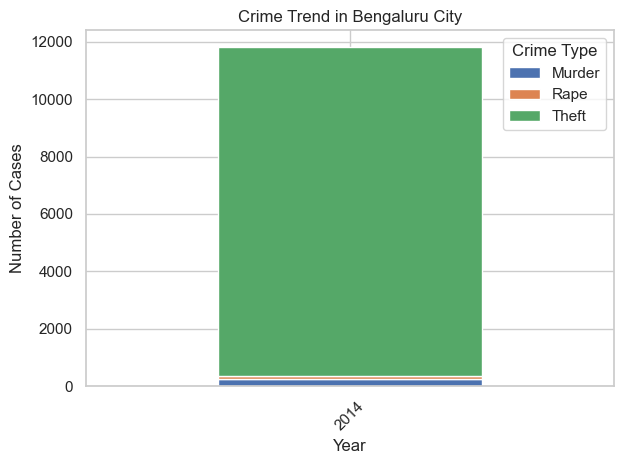

In [27]:
district = "Bengaluru City"

district_data = df[df['District'] == district]

plt.figure(figsize=(10,6))
selected_crimes = ['Murder', 'Rape', 'Theft']
district_data_plot = district_data.groupby('Year')[selected_crimes].sum()

district_data_plot.plot(kind='bar', stacked=True)
plt.title(f"Crime Trend in {district}")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()


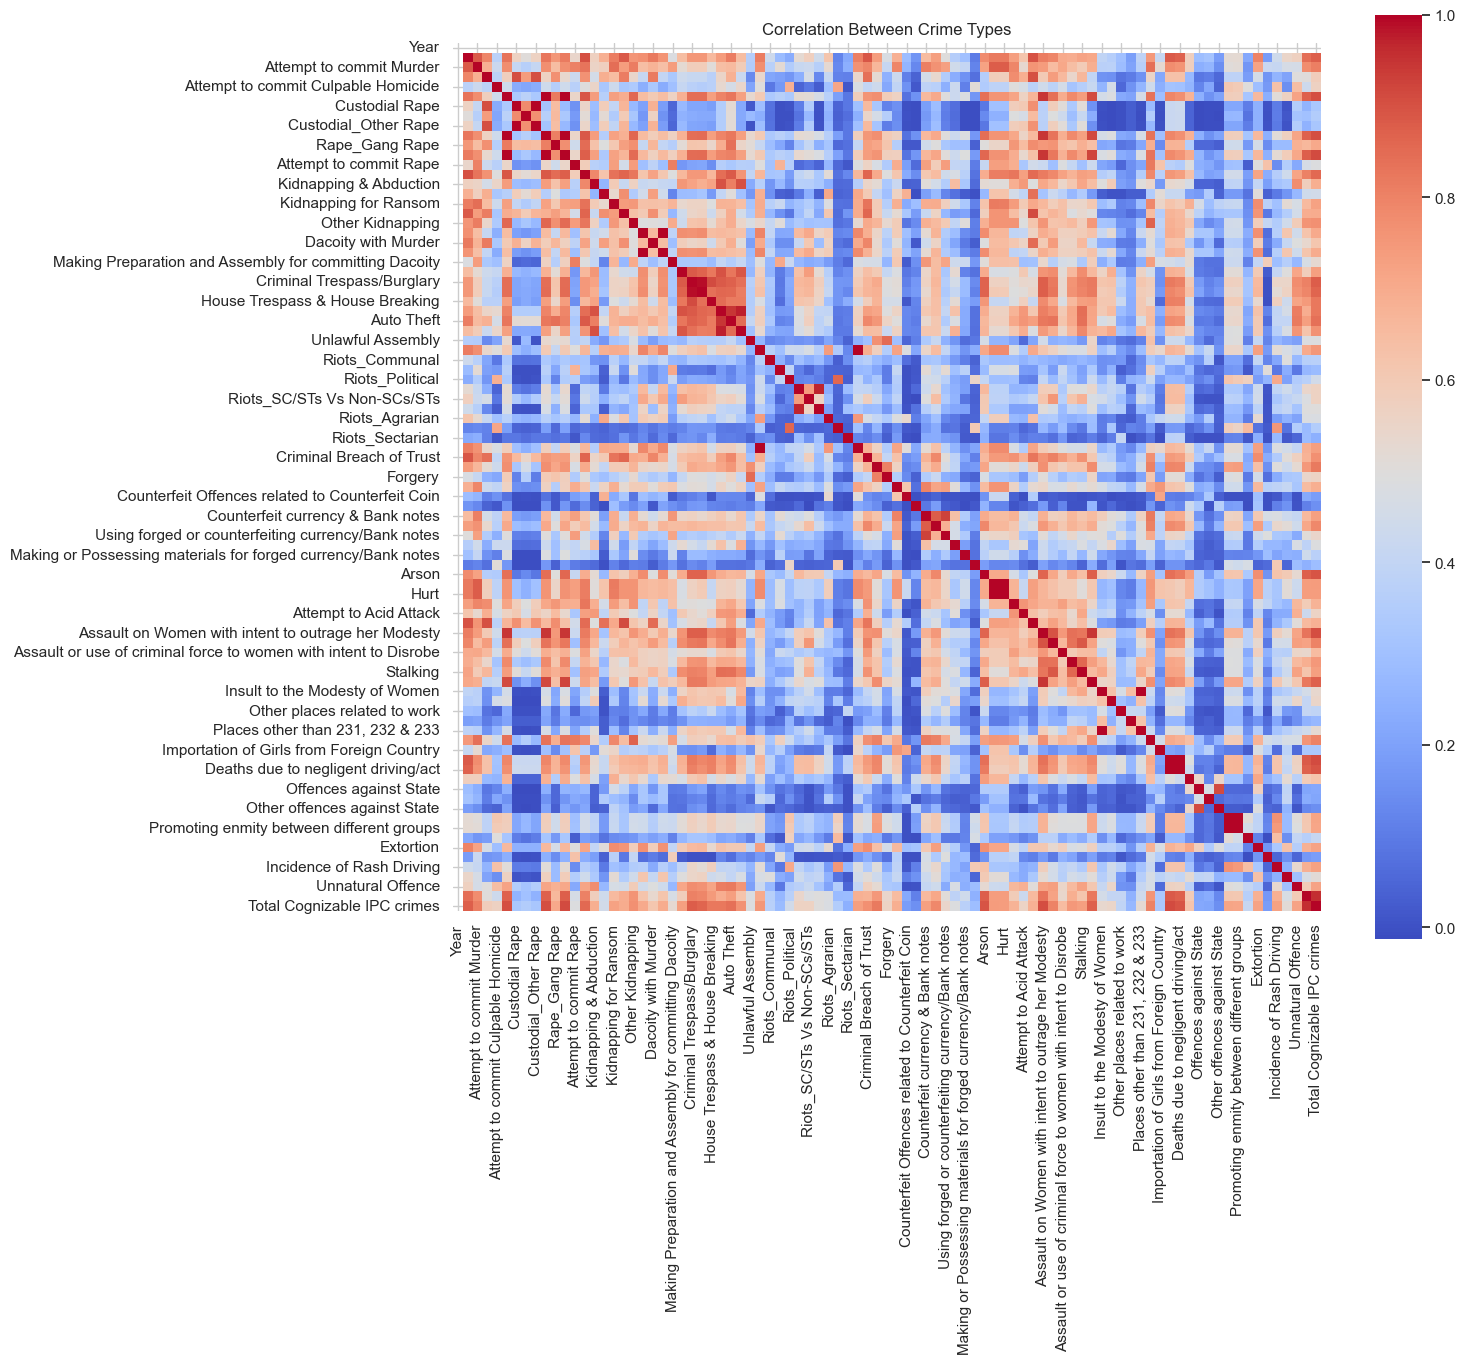

In [29]:
# Pick only numeric columns (crime counts)
crime_corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(14,12))
sns.heatmap(crime_corr, cmap='coolwarm', square=True, annot=False)
plt.title("Correlation Between Crime Types")
plt.show()


C:\Users\Student\AppData\Local\Temp\ipykernel_8276\539029000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.index, y=top_crimes.values, palette='Blues_d')


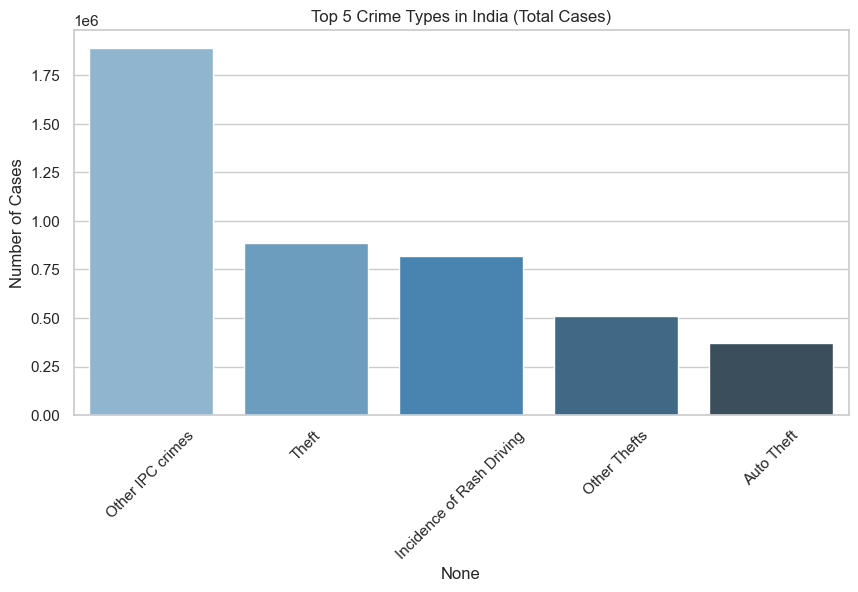

In [31]:
crime_types = df.columns[3:-1]  # exclude State, District, Year, Total
top_crimes = df[crime_types].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette='Blues_d')
plt.title("Top 5 Crime Types in India (Total Cases)")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()


In [1]:
pip install notifications

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 2
  ╰─> [439 lines of output]
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
         -----

In [2]:
# 📌 Cell 1: Install required packages and download GloVe
!pip install gensim --quiet
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\sanke\\AppData\\Roaming\\Python\\Python312\\site-packages\\numpy-1.26.4.dist-info\\INSTALLERlootm4v8.tmp'


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# Step 1: Install required libraries (only run once)
! pip install transformers torch

# Step 2: Import necessary library
from transformers import pipeline

# Step 3: Load the sentiment analysis pipeline using a pre-trained model
sentiment_pipeline = pipeline("sentiment-analysis")

# Step 4: Define input sentences (simulating real-world user reviews)
input_sentences = [
    "The new phone I bought is absolutely amazing!",
    "Worst customer service ever. I'm never coming back.",
    "The experience was average, nothing special.",
    "Fast delivery and the packaging was perfect.",
    "The product broke within two days. Very disappointed."
]

# Step 5: Perform sentiment analysis
results = sentiment_pipeline(input_sentences)

# Step 6: Display the results
print("Sentiment Analysis Results:\n")
for sentence, result in zip(input_sentences, results):
    print(f"Input Sentence: {sentence}")
    print(f"Predicted Sentiment: {result['label']}, Confidence Score: {result['score']:.2f}\n")


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.52.2-py3-none-any.whl.metadata (40 kB)
  Using cached torch-2.7.0-cp312-cp312-win_amd64.whl.metadata (29 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached transformers-4.52.2-py3-none-any.whl (10.5 MB)
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.8/212.5 MB 2.1 MB/s eta 0:01:41
   ---------------------------------------- 1.8/212.5 MB 3.0 MB/s eta 0:01:10
   ---------------------------------------- 2.4/212.5 MB 3.2 MB/s eta 0:01:06
    ---

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\sanke\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sanke\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is 

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Sentiment Analysis Results:

Input Sentence: The new phone I bought is absolutely amazing!
Predicted Sentiment: POSITIVE, Confidence Score: 1.00

Input Sentence: Worst customer service ever. I'm never coming back.
Predicted Sentiment: NEGATIVE, Confidence Score: 1.00

Input Sentence: The experience was average, nothing special.
Predicted Sentiment: NEGATIVE, Confidence Score: 1.00

Input Sentence: Fast delivery and the packaging was perfect.
Predicted Sentiment: POSITIVE, Confidence Score: 1.00

Input Sentence: The product broke within two days. Very disappointed.
Predicted Sentiment: NEGATIVE, Confidence Score: 1.00



In [2]:
# Required libraries (install before running this script):
# pip install transformers torch

from transformers import pipeline  # Import the summarization pipeline from Hugging Face Transformers

# Load a smaller and faster pre-trained model for summarization
# 't5-small' is lightweight and quick, ideal for small/medium passages
summarizer = pipeline("summarization", model="t5-small")

# Input text to be summarized
text = """
The Industrial Revolution, which took place from the 18th to the 19th centuries, was a period during which predominantly agrarian, rural societies in Europe and America became industrial and urban. Prior to the Industrial Revolution, manufacturing was often done in people’s homes, using hand tools or basic machines. Industrialization marked a shift to powered, special-purpose machinery, factories and mass production. The iron and textile industries, along with the development of the steam engine, played central roles in the Industrial Revolution, which also saw improved systems of transportation, communication and banking. While industrialization brought about an increased volume and variety of manufactured goods and an improved standard of living for some, it also resulted in often grim employment and living conditions for the poor and working classes.
"""

# Generate the summary of the input text
summary = summarizer(text, max_length=60, min_length=30, do_sample=False)

# Print the summarized output
print(summary[0]['summary_text'])

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

C:\Users\sanke\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sanke\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP downloa

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


the Industrial Revolution took place from the 18th to the 19th centuries . the industrial revolution marked a shift to powered, special-purpose machinery, factories and mass production . iron and textile industries, along with the development of the steam engine, played central roles .


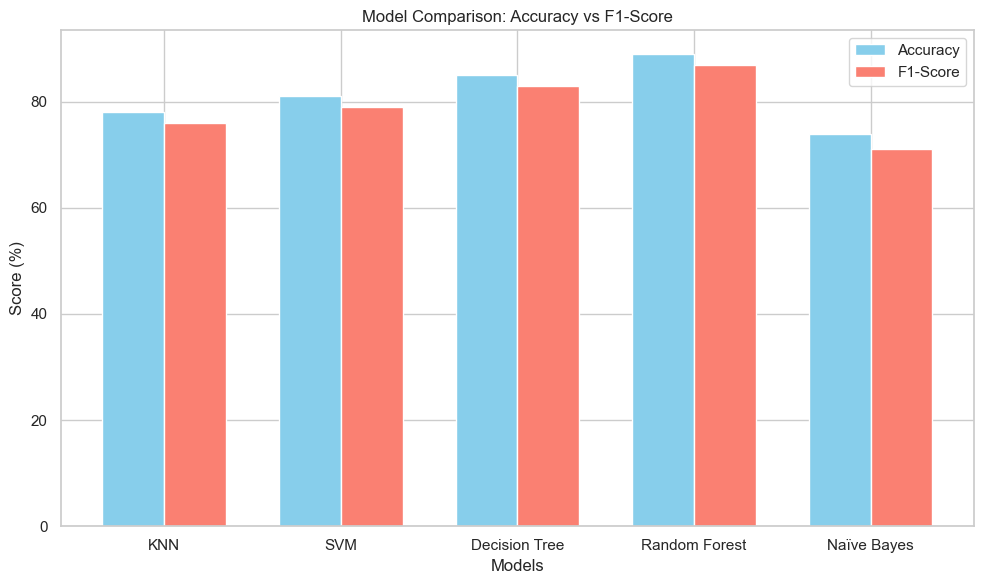

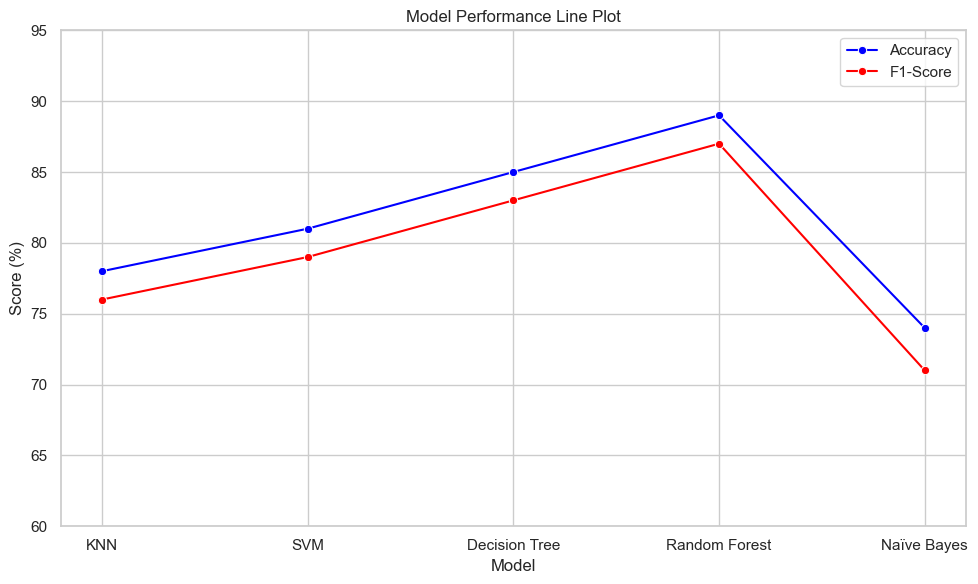

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model performance data
data = {
    'Model': ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naïve Bayes'],
    'Accuracy': [78, 81, 85, 89, 74],
    'F1-Score': [76, 79, 83, 87, 71]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# --- Bar Chart for Accuracy and F1-Score ---
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df))

plt.bar(x, df['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], df['F1-Score'], width=bar_width, label='F1-Score', color='salmon')

plt.xlabel('Models')
plt.ylabel('Score (%)')
#plt.title('Model Comparison: Accuracy vs F1-Score')
plt.xticks([i + bar_width / 2 for i in x], df['Model'])
plt.legend()
plt.tight_layout()
plt.show()

# --- Line Plot for Model Performance ---
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Accuracy', data=df, marker='o', label='Accuracy', color='blue')
sns.lineplot(x='Model', y='F1-Score', data=df, marker='o', label='F1-Score', color='red')

#plt.title('Model Performance Line Plot')
plt.ylabel('Score (%)')
plt.ylim(60, 95)
plt.grid(True)
plt.tight_layout()
plt.show()
